# Bài tập tuần 10
Chọn 1 bộ dữ liệu time-series bất kì, và lấy ra một cột time-series, xây dựng mô hình dự đoán dùng AR, MA, ARMA và ARIMA models.

Với yêu cầu các models bên trên phải được tối ưu hóa tham số mô hình, các mô hình được so sánh dựa trên giá trị AIC. Model nào có giá trị AIC càng nhỏ thì càng tốt. Tối ưu tham số bằng cách duyệt những giá trị có thể dùng for.

Sau đó so sánh kêt quả của 4 models đã được tối ưu tham số từ 4 mô hình bên trên dựa vào giá trị RMSE của tập test.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


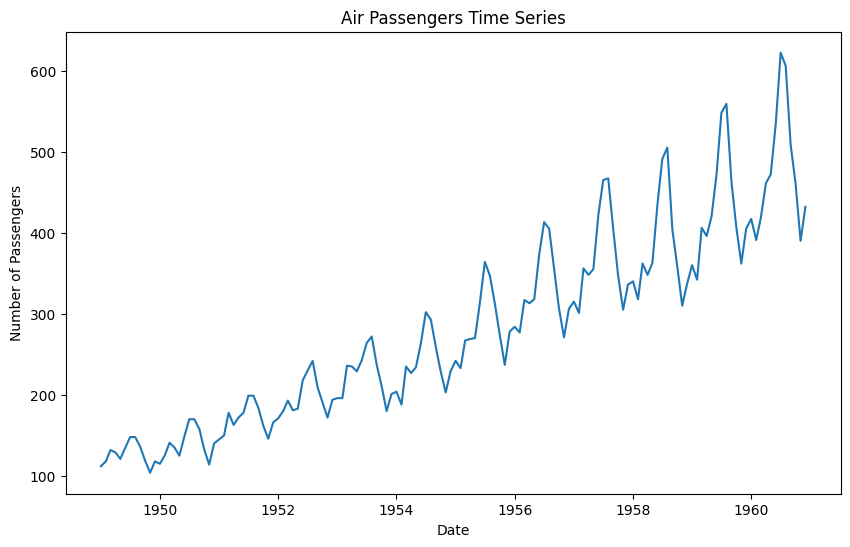

In [23]:
# Load the dataset
file_path = '/content/AirPassengers.csv'
data = pd.read_csv(file_path)

# Convert the 'Month' column to datetime format
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Air Passengers Time Series')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

In [24]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Function to calculate AIC for AR model
def ar_model(data, lags):
    model = AutoReg(data, lags=lags).fit()
    return model.aic

# Function to calculate AIC for MA model
def ma_model(data, q):
    model = ARIMA(data, order=(0, 0, q)).fit()
    return model.aic

# Function to calculate AIC for ARMA model
def arma_model(data, p, q):
    model = ARIMA(data, order=(p, 0, q)).fit()
    return model.aic

# Function to calculate AIC for ARIMA model
def arima_model(data, p, d, q):
    model = ARIMA(data, order=(p, d, q)).fit()
    return model.aic


In [25]:
# Data for models
time_series = data['#Passengers']

# Finding optimal lags for AR model
best_ar_aic = np.inf
best_ar_lag = None
for lag in range(1, 21):
    try:
        aic = ar_model(time_series, lag)
        if aic < best_ar_aic:
            best_ar_aic = aic
            best_ar_lag = lag
    except:
        continue

print(f'Best AR model lag: {best_ar_lag} with AIC: {best_ar_aic}')

# Finding optimal lags for MA model
best_ma_aic = np.inf
best_ma_lag = None
for lag in range(1, 21):
    try:
        aic = ma_model(time_series, lag)
        if aic < best_ma_aic:
            best_ma_aic = aic
            best_ma_lag = lag
    except:
        continue

print(f'Best MA model lag: {best_ma_lag} with AIC: {best_ma_aic}')

# Finding optimal (p, q) for ARMA model
best_arma_aic = np.inf
best_arma_p = None
best_arma_q = None
for p in range(1, 6):
    for q in range(1, 6):
        try:
            aic = arma_model(time_series, p, q)
            if aic < best_arma_aic:
                best_arma_aic = aic
                best_arma_p = p
                best_arma_q = q
        except:
            continue

print(f'Best ARMA model (p, q): ({best_arma_p}, {best_arma_q}) with AIC: {best_arma_aic}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Best AR model lag: 20 with AIC: 968.4988209741512


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS wil

Best MA model lag: 19 with AIC: 1333.4825739251596


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Best ARMA model (p, q): (4, 5) with AIC: 1359.0014224372374


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [26]:
# Finding optimal (p, d, q) for ARIMA model
best_arima_aic = np.inf
best_arima_p = None
best_arima_d = None
best_arima_q = None
for p in range(1, 6):
    for d in range(0, 3):  # Usually, d is 0, 1, or 2
        for q in range(1, 6):
            try:
                aic = arima_model(time_series, p, d, q)
                if aic < best_arima_aic:
                    best_arima_aic = aic
                    best_arima_p = p
                    best_arima_d = d
                    best_arima_q = q
            except:
                continue

print(f'Best ARIMA model (p, d, q): ({best_arima_p}, {best_arima_d}, {best_arima_q}) with AIC: {best_arima_aic}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Best ARIMA model (p, d, q): (5, 1, 5) with AIC: 1335.1189372927988


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [27]:
# Final comparison of the models
results = {
    'AR': best_ar_aic,
    'MA': best_ma_aic,
    'ARMA': best_arma_aic,
    'ARIMA': best_arima_aic
}

best_model = min(results, key=results.get)
print(f'The best model is {best_model} with AIC: {results[best_model]}')


The best model is AR with AIC: 968.4988209741512


In [28]:
# Split the data into training and test sets
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

print(f'Training set size: {len(train)}')
print(f'Test set size: {len(test)}')


Training set size: 115
Test set size: 29


In [29]:
def calculate_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))


In [30]:
# Train the best AR model
best_ar_model = AutoReg(train, lags=best_ar_lag).fit()
ar_pred = best_ar_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# Calculate RMSE for AR model
ar_rmse = calculate_rmse(test, ar_pred)
print(f'AR model RMSE: {ar_rmse}')


AR model RMSE: 32.98183795122052


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [31]:
# Train the best MA model
best_ma_model = ARIMA(train, order=(0, 0, best_ma_lag)).fit()
ma_pred = best_ma_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# Calculate RMSE for MA model
ma_rmse = calculate_rmse(test, ma_pred)
print(f'MA model RMSE: {ma_rmse}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MA model RMSE: 181.49479838559657


In [33]:
# Train the best ARMA model
best_arma_model = ARIMA(train, order=(best_arma_p, 0, best_arma_q)).fit()
arma_pred = best_arma_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# Calculate RMSE for ARMA model
arma_rmse = calculate_rmse(test, arma_pred)
print(f'ARMA model RMSE: {arma_rmse}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARMA model RMSE: 79.30501081767879


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [34]:
# Compare RMSE values for all models
print(f'AR model RMSE: {ar_rmse}')
print(f'MA model RMSE: {ma_rmse}')
print(f'ARMA model RMSE: {arma_rmse}')

# If you have an ARIMA model trained (similar to above)
best_arima_model = ARIMA(train, order=(best_arima_p, best_arima_d, best_arima_q)).fit()
arima_pred = best_arima_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# Calculate RMSE for ARIMA model
arima_rmse = calculate_rmse(test, arima_pred)
print(f'ARIMA model RMSE: {arima_rmse}')

AR model RMSE: 32.98183795122052
MA model RMSE: 181.49479838559657
ARMA model RMSE: 79.30501081767879


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

ARIMA model RMSE: 68.45586563573443
